# **Bootcamp Ciencia de datos e Inteligencia Artificial**
# **Módulo 2. Análisis de datos**
## **Semana 8. Reducción de dimensiones**

¡Hola! Te damos la bienvenida a la última semana de este módulo. Al finalizar, comprenderás el sentido de reducir la dimensionalidad de los datos cuando existen múltiples componentes y aplicarás las técnicas para disminuir las dimensiones según sea el caso.

¡Manos a la obra!


> Antes de iniciar te pido por favor que hagas una copia del presente colab para que puedas practicar por tu cuenta y resolver todos los ejercicios que aparezcan a lo largo del contenido y tu reto semanal. Recuerda que esta función la puedes hacer dando clic en "Archivo" y después en "Guardar una copia en Drive".



> Todos los ejercicios aparecerán con el título **Ponte a prueba**.



Si tienes dudas consulta con tu coach o tutor@.

¡Comencemos!

# 8.1 Reducción de dimensiones

Para los modelos, su rendimiento se beneficia de una determinada cantidad de variables, pues a mayor número incrementa la posibilidad de que dicho modelo se entrene de manera incorrecta y su productividad no sea la esperada. Además, esto elevaría considerablemente los costos y el tiempo de su preparación.

Por lo anterior, se utilizan distintas técnicas para reducir la dimensionalidad de un conjunto de datos y seleccionar los componentes que aporten mayor valor. A continuación, se abordarán las más frecuentes.



## Filtro de baja varianza

El filtro elimina aquellas variables que contienen una baja varianza. Al no tener una diferencia entre sus valores, no se tendrá información relevante para el modelo y por tanto, no se trata de una variable significativa.



In [1]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Para este ejemplo se utilizará el conjunto de datos guardado en `sns`; este es un _dataset_ empleado comunmente para practicar.

Para usar dicho conjunto se ejecuta el siguiente código.

In [2]:
df= sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Con el código `.head()` se visualiza  el nombre de las columnas y las primeras cinco filas.

Asimismo, al utilizar `.value_counts()`, Python indicará cuántos valores hay en una columna.

En este caso, se observarán los valores que tiene la columna `species` y cuántas veces se repiten.

In [3]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Una variante al código de arriba es:

1.   Elemento de la lista
2.   Elemento de la lista


`df['species'].value_counts()`

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Otra forma de obtener el nombre de las columnas de un conjunto de datos es utilizar `.columns`, que a diferencia de `.head()`, solo menciona el nombre de las columnas y muestra los datos de las primeras filas. Lo anterior es útil sobre todo en conjunto de datos muy grandes.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Al usar `.describe()` se observan los datos estadísticos de cada variable.

Para este caso, se aprecia que la columna `petal_with` tiene una baja varianza (valor `std`), así que podría eliminarse del conjunto de datos.

Sin embargo, la eliminación de la columna no se realiza de forma automática. Para hacerlo, se utiliza el siguiente código:

```python
df = df.drop('nombre_columna', axis=1)
```

## Multicolinealidad

###  Factor de inflación de varianza

La multicolinealidad afecta al desempeño del modelo, pues al tener una alta correlación con las variables, dificulta la detección del impacto individual de las variables. Ante esto, el factor de inflación de varianza (VIF) resulta sumamente útil para eliminar variables que presentan multicolinealidad.

##### **Ponte a prueba**

Eres un analista de datos que trabaja con un conjunto de datos sobre propiedades inmobiliarias. Este conjunto contiene numerosas características relacionadas con las propiedades, como el número de habitaciones, superficie en metros cuadrados, ubicación, entre otros.

Tu objetivo es preparar este conjunto de datos para un análisis posterior, asegurándote de que las características sean relevantes y no redundantes.

Puedes descargar el conjunto de datos del siguiente enlace: https://drive.google.com/file/d/1HbJVn7I9HtE4kNGTWkkdN1oZ1V9RJUrB/view?usp=sharing

Tus tareas son:

1. Cargar el conjunto de datos.
2. Aplicar un filtro de baja varianza para eliminar las características que tienen una varianza por debajo de un umbral que consideres adecuado.
3. Detectar y listar las características que presenten multicolinealidad, es decir, aquellas que estén altamente correlacionadas entre sí.
4. Calcular el Factor de Inflación de Varianza (FIV) para las características seleccionadas y eliminar aquellas con un FIV superior a 5.

In [6]:
#1. Cargar el conjunto de datos
df_original = pd.read_csv(r"C:\Users\Equipo 1\Downloads\datasets\dataset_propiedades.csv")
df_original

,num_habitaciones,superficie_m2,num_baños,edad_propiedad,distancia_centro,num_colegios_cerca,precio_m2_cercano,num_comercios_cerca,superficie_por_habitacion
0,-1.889541,-0.681052,-0.446183,0.128104,-0.652624,-1.430775,-0.040158,0.840644,0.360432
1,-0.080717,-0.037222,0.732640,-0.071601,0.051946,-0.196350,-0.259042,0.727630,0.461147
2,1.345420,0.223884,1.882024,0.481009,0.471468,0.725767,0.109395,-0.790474,0.166405
3,-0.385314,0.462103,0.069802,-0.981509,-0.600217,0.010233,1.163164,0.199060,-1.199292
4,0.734878,0.282580,0.490975,-0.167122,1.607346,-0.583077,0.860473,-0.248691,0.384526
...,...,...,...,...,...,...,...,...,...
295,0.346448,-1.320457,0.250493,-1.236951,0.296985,0.781823,0.259883,0.521942,-3.811411
296,0.216459,-1.077745,-0.730367,0.064280,0.679598,1.088951,-0.471932,-0.715304,-4.978988
297,-1.081548,0.203464,-0.646573,-1.606446,-1.422254,-0.955540,-0.127918,-0.756351,-0.188123
298,1.441569,-0.576892,0.529804,1.006293,-1.129707,-0.384556,-0.860413,0.835692,-0.400183


In [7]:
#2. Aplicar un filtro de baja varianza para eliminar las características que 
#tienen una varianza por debajo de un umbral que consideres adecuado.
df_original.describe()

,num_habitaciones,superficie_m2,num_baños,edad_propiedad,distancia_centro,num_colegios_cerca,precio_m2_cercano,num_comercios_cerca,superficie_por_habitacion
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.016261,0.081150,0.017859,0.009847,-0.000781,0.146271,-0.007816,0.021867,-0.676677
std,1.007014,1.004157,1.031267,0.990886,1.001585,0.982934,0.942071,0.923414,12.199273
min,-2.921350,-2.940389,-3.241267,-2.619745,-2.896255,-2.423879,-3.019512,-2.650970,-175.591770
25%,-0.670871,-0.650283,-0.630410,-0.623746,-0.680168,-0.530901,-0.612024,-0.625143,-1.221648
50%,-0.056247,0.109007,0.019614,0.008708,-0.031741,0.184295,0.006765,0.048691,-0.104618
75%,0.621547,0.744011,0.708524,0.667587,0.612741,0.779118,0.601459,0.635677,0.994745
max,3.193108,2.759660,3.078881,2.560085,3.137749,3.852731,2.526932,2.403416,38.878085


In [8]:
df_original.info() #todos los datos están completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_habitaciones           300 non-null    float64
 1   superficie_m2              300 non-null    float64
 2   num_baños                  300 non-null    float64
 3   edad_propiedad             300 non-null    float64
 4   distancia_centro           300 non-null    float64
 5   num_colegios_cerca         300 non-null    float64
 6   precio_m2_cercano          300 non-null    float64
 7   num_comercios_cerca        300 non-null    float64
 8   superficie_por_habitacion  300 non-null    float64
dtypes: float64(9)
memory usage: 21.2 KB


In [9]:
df_varianza_baja = df_original.drop('num_comercios_cerca',axis=1)
df_varianza_baja.describe()

,num_habitaciones,superficie_m2,num_baños,edad_propiedad,distancia_centro,num_colegios_cerca,precio_m2_cercano,superficie_por_habitacion
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.016261,0.081150,0.017859,0.009847,-0.000781,0.146271,-0.007816,-0.676677
std,1.007014,1.004157,1.031267,0.990886,1.001585,0.982934,0.942071,12.199273
min,-2.921350,-2.940389,-3.241267,-2.619745,-2.896255,-2.423879,-3.019512,-175.591770
25%,-0.670871,-0.650283,-0.630410,-0.623746,-0.680168,-0.530901,-0.612024,-1.221648
50%,-0.056247,0.109007,0.019614,0.008708,-0.031741,0.184295,0.006765,-0.104618
75%,0.621547,0.744011,0.708524,0.667587,0.612741,0.779118,0.601459,0.994745
max,3.193108,2.759660,3.078881,2.560085,3.137749,3.852731,2.526932,38.878085


### 3. Detectar y listar las características que presenten multicolinealidad, es decir, aquellas que estén altamente correlacionadas entre sí.

#### Superficie_m2 y superficie_por_habitacion

In [11]:
#Matriz de correlación general entre todas las variables
corr = df_varianza_baja.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_habitaciones,superficie_m2,num_baños,edad_propiedad,distancia_centro,num_colegios_cerca,precio_m2_cercano,superficie_por_habitacion
num_habitaciones,1.000000,-0.017961,0.054328,-0.023149,-0.007143,0.115883,-0.075769,0.005729
superficie_m2,-0.017961,1.000000,0.052703,0.006131,0.007687,0.014924,-0.009844,-0.024680
num_baños,0.054328,0.052703,1.000000,-0.033133,-0.003919,0.017945,-0.029536,0.047758
edad_propiedad,-0.023149,0.006131,-0.033133,1.000000,-0.065704,-0.035391,-0.020762,-0.042542
distancia_centro,-0.007143,0.007687,-0.003919,-0.065704,1.000000,-0.092069,-0.011715,-0.012038
num_colegios_cerca,0.115883,0.014924,0.017945,-0.035391,-0.092069,1.000000,0.002345,0.005212
precio_m2_cercano,-0.075769,-0.009844,-0.029536,-0.020762,-0.011715,0.002345,1.000000,-0.091842
superficie_por_habitacion,0.005729,-0.024680,0.047758,-0.042542,-0.012038,0.005212,-0.091842,1.000000


las correlaciones más grandes son las de las variables de superficie_m2, num_baños y edad_propiedad


### 4. Calcular el Factor de Inflación de Varianza (FIV) para las características seleccionadas y eliminar aquellas con un FIV superior a 5.

                    Variable       VIF
0                      const  1.000000
1           num_habitaciones  1.000369
2              superficie_m2       inf
3                  num_baños  1.002916
4           distancia_centro  1.000058
5         num_colegios_cerca  1.000708
6          precio_m2_cercano  1.000110
7        num_comercios_cerca  1.013148
8  superficie_por_habitacion  1.000844


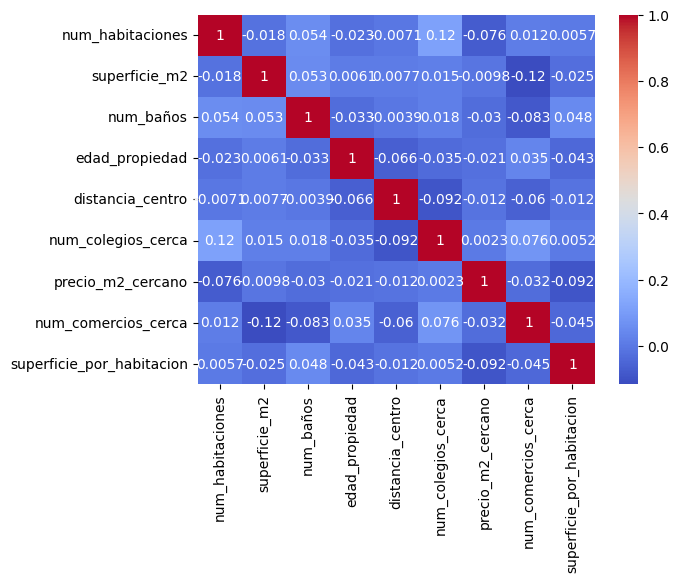

In [22]:

#El VIF se calcula como 1/(1-R2)
y = df_original['superficie_m2']
X = df_original.drop(columns=['edad_propiedad'])

X = sm.add_constant(X)

# Initialize an empty list to store the VIF results
vif_data = []

# Calculate VIF for each independent variable
for i in range(X.shape[1]):
    vif = {}
    vif["Variable"] = X.columns[i]
    vif["VIF"] = 1 / (1 - sm.OLS(y, X.iloc[:, i]).fit().rsquared)
    vif_data.append(vif)

# Convert the list of VIF results to a DataFrame
vif_df = pd.DataFrame(vif_data)

# Show the results of VIF
print(vif_df)

# Visualize the data with seaborn (example of a correlation heatmap)
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm')
plt.show()


## PCA

El análisis de componentes principales o  _Principal Component Analysis_, por sus siglas en inglés, es un método que crea un conjunto de variables nuevas mediante la información de las variables totales, es decir, baja la dimensionalidad en un subespacio tratando de preservar las carácteristicas principales.

En otras palabras, combina las columnas existentes para crear nuevas, al tiempo que conserva las características de las originales.

Para ejecutar un análisis de este tipo, primero se deben escalar los datos utilizando `StandarScaler()`, importado en el primer paso de la siguiente línea:
```python
from sklearn.preprocessing import LabelEncoder, StandardScaler
```  
Después, se hace una variable (nombrada `escalador`para fines del ejemplo) compuesta por la función `StandarScaler()`,con el propósito de facilitar tanto la escritura como la lectura del código.

In [23]:
#Escalamos nuestras variables
escalador= StandardScaler()

A continuación se crea un nuevo conjunto de datos (en este ejemplo se llamará `df_esc`), igual a la variable realizada previamente, y se ajustará el _dataset_ `df` con la función `.fit_transform`.

Si observas bien, se seleccionaron las columnas que tienen valores numéricos (en el ejemplo: `sepal_length`, `sepal_width`, `petal_length` y `petal_width`).

In [24]:
df_esc=escalador.fit_transform(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

Una vez que todos los datos están escalados, ahora se puede usar el **PCA**.

Para empezar, se emplea el código importado en el primer paso en la línea:
```python
from sklearn.decomposition import PCA
```

Es importante declarar una variable (llamada `pca` para fines del ejemplo), que será igual al modelo `PCA()` ya importado.

In [8]:
pca = PCA()

Aquí vale la pena hacer una anotación importante: si en el código se escribe
```python
pca = PCA(3)```,  Python entenderá que el conjunto de datos original se debe transformar en un _dataset_ con 3 variables o columnas, aunque propiamente se dice que con 3 **componentes**.

Si se deja vacío entre los paréntesis, como en el ejemplo, el número de variables o columnas será igual al del _dataset_ que se pretende transformar.

Ahora, se aplica una función llamada `.fit_tranform`, que al combinarse con la variable `pca` «entrena» el conjunto de datos para tranformarlo.

In [9]:
pca.fit_transform(df_esc)

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

Observa que se aplicó el `fit_transform` sobre el conjunto de datos escalado (recordarás que incluso se cambió el nombre a `df_esc`).

Se crea una nueva variable (llamada en este ejemplo `pca_variance`) que indicará la varianza de cada una de las variables o columnas.

In [10]:
pca_variance = pca.explained_variance_
pca_variance

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

Por último, para hacer más visual los resultados, se elabora un diagrama de barras.

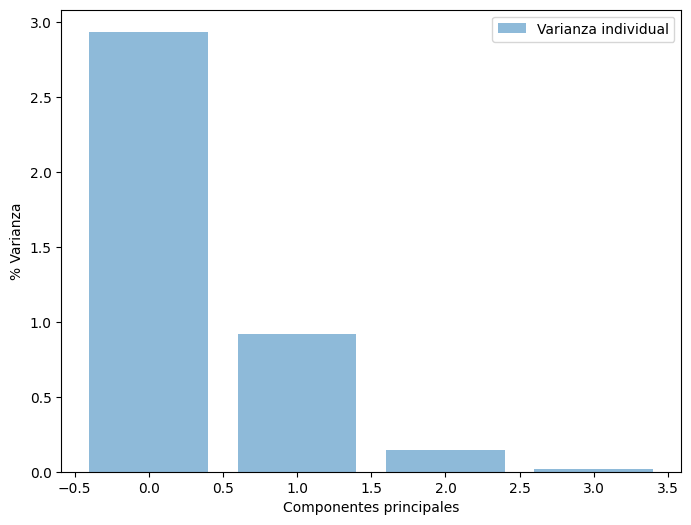

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(range(4), pca_variance, alpha=0.5, align='center', label="Varianza individual")
plt.legend()
plt.ylabel('% Varianza')
plt.xlabel('Componentes principales')
plt.show()

## Ejercicio Ingrid:

Realiza el PCA con 2 componentes del dataset propuesto.

A manera de reppaso, encontrarás que hasta el momento has hecho lo siguiente:
1. Escalar el _dataframe_.
2. Entrenar el modelo **PCA** (usando `fit_transform`).
3. Aplicar `.explained_variance` para ver resultados.
4. Graficar

In [25]:
#Importarciones
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [26]:
#1. Escalar el dataframe
variable_escalador = StandardScaler()

In [28]:
#2. Entrenar el modelo PCA (usando fit_transform)
df_esc = variable_escalador.fit_transform(df_original[['edad_propiedad', 'superficie_m2']])

In [29]:
#2.2 Instaciamos PCA en una variable
pca = PCA()

pca.fit_transform(df_esc)

array([[ 4.53092774e-01,  6.22154012e-01],
       [ 1.41713941e-01,  2.52748827e-02],
       [-4.37466394e-01,  2.36109453e-01],
       [ 4.39915756e-01, -9.77331761e-01],
       [-1.55821932e-02, -2.68577802e-01],
       [-1.85015726e-01,  1.45724118e+00],
       [ 2.70097550e-01, -1.12343969e+00],
       [ 1.08973008e+00,  1.52178728e-01],
       [-1.14477392e+00, -3.42703319e-01],
       [-1.47296959e+00, -5.61108115e-01],
       [ 4.70405037e-01,  1.36859362e-01],
       [-7.99357892e-01, -1.78948787e-01],
       [ 1.44213987e+00, -3.50171155e-01],
       [-8.97878643e-01,  1.44251244e-01],
       [-1.97193109e+00, -1.43049456e+00],
       [ 5.97067903e-01, -1.02205900e+00],
       [-1.38699719e+00,  1.49188353e+00],
       [ 1.95499632e+00,  4.94008994e-01],
       [ 3.37450406e-01,  1.49928748e+00],
       [ 1.23079967e+00, -2.43437712e+00],
       [ 1.11014904e+00, -1.44660677e+00],
       [-3.22374340e-01, -1.03615709e+00],
       [ 5.09932562e-01, -1.44820254e+00],
       [-1.

In [30]:
#3. Usamos explained_variance
pca_variance_2 = pca.explained_variance_
pca_variance_2

array([1.00949602, 0.99719294])

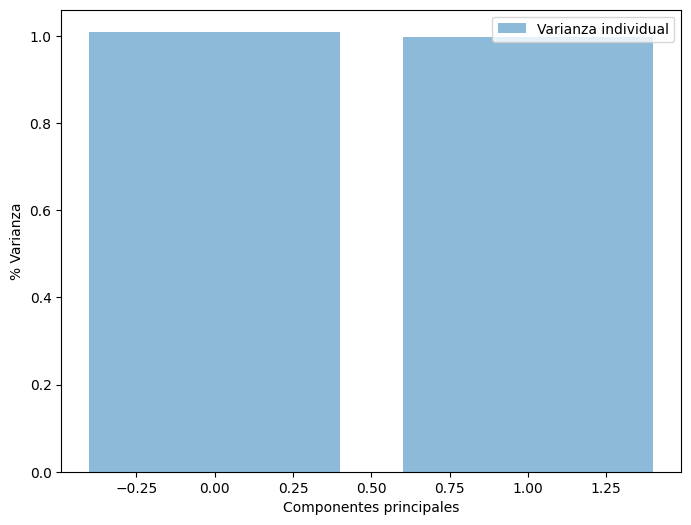

In [37]:
#4. Grafica
plt.figure(figsize=(8, 6))
plt.bar(range(2), pca_variance_2, alpha=0.5, align='center', label="Varianza individual")
plt.legend()
plt.ylabel('% Varianza')
plt.xlabel('Componentes principales')
plt.show()

## Variable Clustering (VarClus)

Esta técnica se vale de un modelo que ayuda a reducir las dimensiones por medio de agrupamientos para elegir a los componentes principales maximizando la varianza. Aunque es similar a la técnica de PCA, se diferencia de esta debido a que los agrupamientos eliminan las variables y conservan las más importantes.

No te alarmes si no comprendes del todo el significado de la «clusterización», más adelante verás una explicación más detallada de este tipo de análisis. Por el momento,  nos enfocaremos en su uso para disminuir dimensiones.

La siguiente función no aparece por defecto en **Google Colab** y posiblemente tampoco en alguna otra computadora, por eso se instala usando **pip**, un gestor de descargas de Python.

In [12]:
pip install varclushi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 843.6 kB/s eta 0:00:00


El código mostrado arriba (`pip install varclushi`) solo se ejecuta la primera vez que lo uses, pues se trata de una instrucción de instalación.

También podria ejecutarse nuevamente la instrucción, considerando que la única diferencia es en la solicitud, pues ahora solicitará la descarga de una función almacenada previamente en tu computadora o entorno virtual.

Finalmente, es momento de importar la librería.

In [38]:
from varclushi import VarClusHi

Aquí se construya nueva variable, lllamada para el ejemplo `vc`, que será igual a la función `VaeClusHi()`.
En este caso, se colocan dentro de los paréntesis solo aquellas variables o columnas con valores númericos.

Si observas bien, advertirás un parámetro llamado `maxeigenval2`, que sirve como limitador del segundo valor mayor.


In [39]:
vc = VarClusHi(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],maxeigval2=.7)

In [40]:
vc.varclus()

Se puede usar la función `.rsquare` sobre la nueva variale para conocer la relación $R^2$ de cada variable.

In [41]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,sepal_length,0.867479,0.013823,0.134378
1,0,petal_length,0.969018,0.183561,0.037948
2,0,petal_width,0.933244,0.134048,0.077090
3,1,sepal_width,1.000000,0.102084,0.000000


In [42]:
vc.rsquare.sort_values(["Cluster","RS_Ratio"],ascending=True).drop_duplicates(subset=["Cluster"],keep="first")

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
1,0,petal_length,0.969018,0.183561,0.037948
3,1,sepal_width,1.000000,0.102084,0.000000


Se observa que las variables "sepal_lenght", "petal_width" y "petal_lenght" se agruparon para un mismo cluster; en este caso, se opta por la variable perteneciente al clúster con mayor varianza explicada.

Duda: la varianza más baja siempre será aquella que esté más cerca al cero?

Ahora conoces las técnicas más utilizadas para reducir las dimensiones de un conjunto de datos.
Recuerda que este paso es muy importante para optimizar el rendimiento del modelo y garantizar su mejor funcionamiento.


##### **Ponte a prueba 2**

Eres un científico de datos que trabaja en una empresa de productos cosméticos. Tienes un conjunto de datos con características químicas de diferentes productos. Estás interesado en reducir la dimensionalidad del conjunto de datos y agrupar características similares para simplificar el análisis.

Puedes descargar el conjunto de datos del siguiente enlace:: https://drive.google.com/file/d/1zHGcAuDKKTTyKugwZbt_4X8_9Mqms65T/view?usp=sharing

Tus tareas son:

1. Cargar el conjunto de datos.
2. Realizar una estandarización de las características.
3. Aplicar PCA para reducir la dimensionalidad del conjunto de datos.
4. Graficar la varianza explicada acumulada para determinar cuántos componentes principales conservar.

## Ponte a prueba 2 Ingrid

In [44]:
#1. Cargar el conjunto de datos
df_cosmeticos = pd.read_csv(r"C:\Users\Equipo 1\Downloads\datasets\dataset_cosmeticos.csv")
df_cosmeticos.head()

,pH,viscosidad,contenido_agua,contenido_alcohol,nivel_fragancia,contenido_aceite,vitaminas,antioxidantes,agentes_conservantes,colorantes
0,0.513085,0.431923,0.953125,0.516178,-0.971657,0.725096,-0.626717,0.862393,-0.641482,-1.379618
1,-0.147057,-0.563725,0.975120,-0.321386,-0.012247,-0.825497,0.075805,-0.677162,0.412931,-0.897254
2,-0.075764,0.817890,1.039112,-1.071857,0.326745,0.670481,0.622207,-1.138833,-1.553759,0.300474
3,-0.098890,0.321698,0.081829,-0.290275,0.388579,0.919076,-0.006071,0.838491,0.267392,2.493000
4,0.104356,0.921650,1.617213,-1.330314,0.105894,-0.898784,1.976441,-1.564242,-0.189120,0.584413


In [48]:
df_cosmeticos.info() #los datos están completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pH                    300 non-null    float64
 1   viscosidad            300 non-null    float64
 2   contenido_agua        300 non-null    float64
 3   contenido_alcohol     300 non-null    float64
 4   nivel_fragancia       300 non-null    float64
 5   contenido_aceite      300 non-null    float64
 6   vitaminas             300 non-null    float64
 7   antioxidantes         300 non-null    float64
 8   agentes_conservantes  300 non-null    float64
 9   colorantes            300 non-null    float64
dtypes: float64(10)
memory usage: 23.6 KB


In [79]:
#2. Realizar una estandarización de las características
escala_estandar = StandardScaler()
df_transformado = escala_estandar.fit_transform(df_cosmeticos)
df_transformado



array([[ 0.46186942,  0.29649882,  0.86076729, ...,  0.91312057,
        -0.74315522, -1.34457527],
       [-0.17026751, -0.72427512,  0.88212231, ..., -0.69009533,
         0.39965358, -0.89591723],
       [-0.10199895,  0.69220647,  0.9442533 , ..., -1.17085688,
        -1.7319123 ,  0.21811876],
       ...,
       [ 0.3823487 , -0.34762909,  0.30618948, ...,  2.17768872,
        -0.32865431, -0.38621249],
       [-0.5208899 , -0.34217269,  0.65464088, ..., -1.02856091,
        -2.82504014, -0.21277715],
       [ 2.61313546, -1.96004555,  0.96473782, ...,  0.54143845,
        -0.07561391, -0.96687807]])

In [91]:
#3. Aplicar PCA para reducir la dimensionalidad del conjunto de datos.
pca = PCA()
pca2 = pca.fit_transform(df_transformado)
pca2

array([[ 1.40911469, -0.31049347, -0.40803851, ..., -0.16183427,
         1.11946163,  0.55821814],
       [-0.100409  ,  0.86326072,  0.2917551 , ...,  1.14037811,
         0.77152194, -0.51882014],
       [-0.89563963,  1.20140292,  0.86790505, ..., -0.45595877,
        -0.8312942 ,  0.45980961],
       ...,
       [ 0.97947105, -1.39930912, -0.45788246, ..., -0.76027858,
         1.17492799,  0.94470062],
       [-1.0257894 ,  1.37489388,  0.71219075, ..., -0.32711517,
         0.61865555,  0.83560335],
       [-0.04768597, -1.4193912 ,  1.56571756, ...,  1.05255672,
         0.70931511,  1.14269601]])

In [94]:
pca_cosmetico = pca.explained_variance_
pca_cosmetico

array([1.30462097, 1.16447546, 1.13785776, 1.10684965, 1.04992046,
       0.95504994, 0.87301121, 0.83625685, 0.82408752, 0.781315  ])

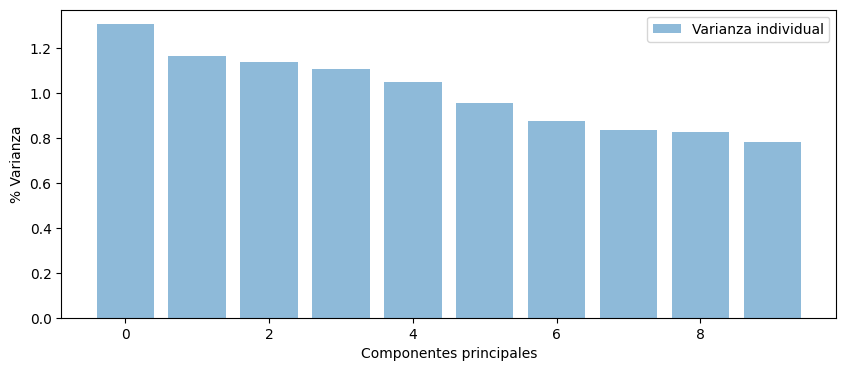

In [89]:
#4. Graficar la varianza explicada acumulada para determinar 
#cuántos componentes principales conservar.
plt.figure(figsize=(10, 4))
plt.bar(range(10), pca_cosmetico, alpha=0.5, align='center', label="Varianza individual")
plt.legend()
plt.ylabel('% Varianza')
plt.xlabel('Componentes principales')
plt.show()

#Próximos pasos
Terminaste la semana 8. Estás a un paso de obtener la insignia correspondiente a este módulo. Presta mucha atención a tu proyecto e implementa todo lo que has aprendido.

¡Éxito! ⭐

# Ejercicios clase

In [ ]:
#Comenzamos aquí
